In [ ]:
'''
Andy Liu, Justin Jiang
Harvey Mudd Math 189R 
lstm.ipynb - Python notebook building LSTM model 
for topic sentiment prediction of Presidential approval ratings
'''

In [2]:
import pandas as pd
import numpy as np

In [3]:
#load in textsent dataset
textsent = pd.read_csv('./textsent.csv')
textsent.head()

,Unnamed: 0,date,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,0,2016-01-01,0.000000,0.000000,0.000000,-0.315247,-0.174879,-0.178399,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2016-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2016-01-03,0.000000,0.000000,0.000000,0.000000,-0.041965,0.059692,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2016-01-04,0.000000,-0.552873,0.118425,0.567527,0.000000,-0.201569,-0.757216,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2016-01-05,-0.081609,0.270440,0.032612,-0.033010,-0.122376,-0.360196,0.018746,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#load in approval rating data
approval = pd.read_csv('/Users/andyliu/Downloads/trump-approval-ratings 2/approval_topline.csv')

In [5]:
approval.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
0,Donald Trump,Voters,7/17/2020,40.739294,45.024790,36.453797,55.192133,59.723193,50.661073,18:13:56 17 Jul 2020
1,Donald Trump,Adults,7/17/2020,39.566988,43.139093,35.994883,56.265487,60.194595,52.336379,18:11:46 17 Jul 2020
2,Donald Trump,All polls,7/17/2020,40.185953,44.467984,35.903922,55.677787,60.251297,51.104278,18:10:23 17 Jul 2020
3,Donald Trump,Adults,7/16/2020,39.631040,43.337984,35.924097,56.269399,60.367937,52.170861,13:46:09 16 Jul 2020
4,Donald Trump,Voters,7/16/2020,40.943184,45.285427,36.600940,55.005862,59.585702,50.426021,13:47:44 16 Jul 2020


In [6]:
#process data - only consider "all polls" estimate
approval_df = approval.loc[approval['subgroup'] == 'All polls']
approval_df.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
2,Donald Trump,All polls,7/17/2020,40.185953,44.467984,35.903922,55.677787,60.251297,51.104278,18:10:23 17 Jul 2020
5,Donald Trump,All polls,7/16/2020,40.337064,44.703125,35.971004,55.579876,60.257302,50.902450,13:45:02 16 Jul 2020
8,Donald Trump,All polls,7/15/2020,40.311810,44.653608,35.970012,55.620666,60.275325,50.966008,17:17:02 15 Jul 2020
9,Donald Trump,All polls,7/14/2020,40.311076,44.401879,36.220273,55.205477,59.973027,50.437928,19:02:02 14 Jul 2020
14,Donald Trump,All polls,7/13/2020,40.442940,44.451422,36.434457,55.169294,59.908563,50.430025,16:47:00 13 Jul 2020


In [7]:
#select relevant columns
approval_df = approval_df[['modeldate', 'approve_estimate']]
approval_df.head()

,modeldate,approve_estimate
2,7/17/2020,40.185953
5,7/16/2020,40.337064
8,7/15/2020,40.311810
9,7/14/2020,40.311076
14,7/13/2020,40.442940


In [8]:
approval_df['approve_estimate'] = approval_df['approve_estimate'].astype('float64')
approval_df['modeldate'] = pd.to_datetime(approval_df['modeldate'])

In [9]:
approval_df = approval_df.sort_values(ascending=True, by=['modeldate'])
approval_df.head()

,modeldate,approve_estimate
3813,2017-01-23,45.46693
3812,2017-01-24,45.44264
3808,2017-01-25,47.76497
3805,2017-01-26,44.37598
3802,2017-01-27,44.13586


In [11]:
textsent_df = textsent_df.drop('Unnamed: 0', axis=1)

In [12]:
from datetime import datetime, date

In [13]:
approval_df['modeldate'] = pd.Series(approval_df['modeldate']).astype('datetime64[ms]')

In [14]:
#convert date column to datetime objects
better = []
for i in list(approval_df['modeldate']):
    d = datetime.strptime(str(i)[:10], '%Y-%m-%d').date()
    better.append(d)
approval_df['modeldate'] = better
approval_df.head()

,modeldate,approve_estimate
3813,2017-01-23,45.46693
3812,2017-01-24,45.44264
3808,2017-01-25,47.76497
3805,2017-01-26,44.37598
3802,2017-01-27,44.13586


In [15]:
good = []
for i in list(textsent_df['date']):
    d = datetime.strptime(i, '%Y-%m-%d').date()
    good.append(d)
textsent_df['date'] = good
textsent_df.head()

,date,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
22,2016-01-23,0.000000,0.000000,0.000000,0.000000,0.018309,0.146931,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,2016-01-24,0.000000,0.505255,0.000000,0.467812,0.902088,0.348435,-0.104437,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,2016-01-25,0.000000,-0.069621,0.243343,-0.110215,0.000000,1.134737,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,2016-01-26,0.000000,0.387676,0.000000,0.359927,0.186877,0.061621,0.180408,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2016-01-27,-0.528729,-0.480155,-0.114941,0.069708,0.000000,-0.246252,-0.047342,0.0,-0.031061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#only use intersection of approval data and news coverage timeframes
shared_dates = []
l = list(approval_df['modeldate'])
for d in list(textsent_df['date']):
    if d in l:
        shared_dates.append(d)

915


In [17]:
#shared dates
shared_textsent_df = textsent_df.loc[textsent_df['date'].isin(shared_dates)]
shared_approval_df = approval_df.loc[approval_df['modeldate'].isin(shared_dates)]

In [18]:
shared_approval_df = shared_approval_df.rename(columns={'modeldate':'date'})
shared_approval_df.head()

,date,approve_estimate
3813,2017-01-23,45.46693
3812,2017-01-24,45.44264
3808,2017-01-25,47.76497
3805,2017-01-26,44.37598
3802,2017-01-27,44.13586


In [19]:
#convert sentiment data to 30-day moving averages (for smoother data)
movingAverage = 30
shared_textsent_nodates = shared_textsent_df.iloc[:,1:]
rolling_windows = shared_textsent_nodates.rolling(movingAverage,1)
rolling_mean = rolling_windows.mean()
shared_textsent_nodates = rolling_mean

In [20]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [21]:
#scale data
dfTest = shared_textsent_df.copy(deep=True)
cols = dfTest.columns
cols = cols[1:]
dfTest[cols] = scaler.fit_transform(dfTest[cols])

In [22]:
shared_textsent_df = dfTest
shared_textsent_df.head()

,date,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
388,2017-01-23,0.089063,0.980872,0.041347,0.986340,0.940858,0.939670,0.987970,0.990515,0.782055,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
389,2017-01-24,0.095025,0.975956,0.031997,0.984272,0.909069,0.958263,0.989869,0.989254,0.838313,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
390,2017-01-25,0.158042,0.981104,0.044683,0.984482,0.891815,0.897951,0.989060,0.988754,0.805370,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
391,2017-01-26,0.074485,0.976205,0.042074,0.978763,0.933962,0.971763,0.987524,0.988719,0.795095,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
392,2017-01-27,0.089714,0.981857,0.046552,0.980313,0.858760,0.934564,0.989680,0.986246,0.748545,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [23]:
from sklearn.decomposition import PCA

In [24]:
shared_textsent_nodate = shared_textsent_df.drop('date', axis=1)
shared_textsent_nodate.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
388,0.089063,0.980872,0.041347,0.986340,0.940858,0.939670,0.987970,0.990515,0.782055,0.982423,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
389,0.095025,0.975956,0.031997,0.984272,0.909069,0.958263,0.989869,0.989254,0.838313,0.983827,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
390,0.158042,0.981104,0.044683,0.984482,0.891815,0.897951,0.989060,0.988754,0.805370,0.991431,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
391,0.074485,0.976205,0.042074,0.978763,0.933962,0.971763,0.987524,0.988719,0.795095,0.989850,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
392,0.089714,0.981857,0.046552,0.980313,0.858760,0.934564,0.989680,0.986246,0.748545,0.981320,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [25]:
#split into training, test sets
n_train = 732
train = shared_textsent_nodates[:n_train]
train.shape

(732, 100)

In [26]:
#pca for feature selection. 18 components predicted 95% of variance.
pca = PCA(n_components = 18)
pca.fit(train)
train_X = pca.transform(train)

In [27]:
approval = shared_approval_df['approve_estimate']
approval = pd.Index.to_numpy(approval)
len(approval)

915

In [28]:
#reshape training, test sets
test_X = shared_textsent_nodates[n_train:]

In [29]:
exp_X_train=train_X
exp_X_test=test_X
print(exp_X_train.shape, exp_X_test.shape)

(732, 18) (183, 100)


In [30]:
exp_X_train = np.array(exp_X_train)
exp_X_test = np.array(exp_X_test)

In [31]:
#np.savetxt('xtrain.csv', exp_X_train, delimiter=',')

In [32]:
#np.savetxt('ytrain.csv', exp_y_train, delimiter=',')

In [33]:
exp_y_train=approval[:n_train]
exp_y_test=approval[n_train:]
print(exp_y_train.shape, exp_y_test.shape)

(732,) (183,)


In [34]:
#exp_y_train=exp_y_train[:10]
#exp_X_train=exp_X_train[:10]
exp_X_test = exp_X_test[1:]
exp_X_test.shape

(182, 100)

In [35]:
#reshape everything

In [36]:
X_train= exp_X_train.reshape((exp_X_train.shape[0],1,exp_X_train.shape[1]))
X_test=exp_X_test.reshape((exp_X_test.shape[0],1,exp_X_test.shape[1]))
y_train=exp_y_train
y_test=exp_y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(732, 1, 18) (182, 1, 100) (732,) (183,)


In [37]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [38]:
#basic non-stacked lstm model
model = Sequential()
model.add(LSTM(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [39]:
#stacked lstm model

dropout=0.20
model1 = Sequential()

model1.add(LSTM(60, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='sigmoid'))
model1.add(Dropout(dropout))
model1.add(LSTM(120, return_sequences=True, activation='relu'))
model1.add(Dropout(dropout))
model1.add(LSTM(240, return_sequences=True, activation='relu'))
model1.add(Dropout(dropout))
model1.add(LSTM(60, activation='relu'))
model1.add(Dense(units=1))
model1.add(Activation('relu'))

model1.compile(optimizer='adam', loss='mse')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 60)             18960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 60)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 120)            86880     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 120)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 240)            346560    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 240)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60)               

In [40]:
import matplotlib.pyplot as plt

Epoch 1/1000
732/732 [==============================] - 0s 266us/step - loss: 8.4302
Epoch 2/1000
732/732 [==============================] - 0s 294us/step - loss: 11.2555
Epoch 3/1000
732/732 [==============================] - 0s 308us/step - loss: 10.4149
Epoch 4/1000
732/732 [==============================] - 0s 306us/step - loss: 9.4474
Epoch 5/1000
732/732 [==============================] - 0s 311us/step - loss: 7.6667
Epoch 6/1000
732/732 [==============================] - 0s 312us/step - loss: 7.7127
Epoch 7/1000
732/732 [==============================] - 0s 299us/step - loss: 7.2523
Epoch 8/1000
732/732 [==============================] - 0s 291us/step - loss: 7.2722
Epoch 9/1000
732/732 [==============================] - 0s 280us/step - loss: 8.1451
Epoch 10/1000
732/732 [==============================] - 0s 297us/step - loss: 7.5670
Epoch 11/1000
732/732 [==============================] - 0s 282us/step - loss: 8.1991
Epoch 12/1000
732/732 [==============================] - 0s 3

732/732 [==============================] - 0s 291us/step - loss: 5.7020
Epoch 97/1000
732/732 [==============================] - 0s 290us/step - loss: 6.0738
Epoch 98/1000
732/732 [==============================] - 0s 297us/step - loss: 5.6165
Epoch 99/1000
732/732 [==============================] - 0s 283us/step - loss: 4.6919
Epoch 100/1000
732/732 [==============================] - 0s 282us/step - loss: 5.2463
Epoch 101/1000
732/732 [==============================] - 0s 263us/step - loss: 5.7800
Epoch 102/1000
732/732 [==============================] - 0s 278us/step - loss: 5.2174
Epoch 103/1000
732/732 [==============================] - 0s 282us/step - loss: 5.2890
Epoch 104/1000
732/732 [==============================] - 0s 283us/step - loss: 5.2299
Epoch 105/1000
732/732 [==============================] - 0s 279us/step - loss: 4.9377
Epoch 106/1000
732/732 [==============================] - 0s 263us/step - loss: 4.8132
Epoch 107/1000
732/732 [==============================] - 0s 

732/732 [==============================] - 0s 341us/step - loss: 6.0430
Epoch 285/1000
732/732 [==============================] - 0s 365us/step - loss: 6.0541
Epoch 286/1000
732/732 [==============================] - 0s 301us/step - loss: 7.1321
Epoch 287/1000
732/732 [==============================] - 0s 288us/step - loss: 6.7222
Epoch 288/1000
732/732 [==============================] - 0s 336us/step - loss: 5.3739
Epoch 289/1000
732/732 [==============================] - 0s 341us/step - loss: 4.3352
Epoch 290/1000
732/732 [==============================] - 0s 353us/step - loss: 3.5037
Epoch 291/1000
732/732 [==============================] - 0s 344us/step - loss: 4.4066
Epoch 292/1000
732/732 [==============================] - 0s 355us/step - loss: 5.6847
Epoch 293/1000
732/732 [==============================] - 0s 348us/step - loss: 7.1579
Epoch 294/1000
732/732 [==============================] - 0s 333us/step - loss: 7.6078
Epoch 295/1000
732/732 [==============================] - 

732/732 [==============================] - 0s 399us/step - loss: 3.1793
Epoch 473/1000
732/732 [==============================] - 0s 388us/step - loss: 3.4193
Epoch 474/1000
732/732 [==============================] - 0s 355us/step - loss: 3.4342
Epoch 475/1000
732/732 [==============================] - 0s 324us/step - loss: 3.7880
Epoch 476/1000
732/732 [==============================] - 0s 378us/step - loss: 3.6461
Epoch 477/1000
732/732 [==============================] - 0s 292us/step - loss: 3.5492
Epoch 478/1000
732/732 [==============================] - 0s 308us/step - loss: 3.6407
Epoch 479/1000
732/732 [==============================] - 0s 357us/step - loss: 3.7718
Epoch 480/1000
732/732 [==============================] - 0s 361us/step - loss: 4.0353
Epoch 481/1000
732/732 [==============================] - 0s 292us/step - loss: 3.8839
Epoch 482/1000
732/732 [==============================] - 0s 328us/step - loss: 3.5342
Epoch 483/1000
732/732 [==============================] - 

732/732 [==============================] - 0s 292us/step - loss: 3.2342
Epoch 661/1000
732/732 [==============================] - 0s 269us/step - loss: 3.3677
Epoch 662/1000
732/732 [==============================] - 0s 288us/step - loss: 3.0249
Epoch 663/1000
732/732 [==============================] - 0s 294us/step - loss: 2.9067
Epoch 664/1000
732/732 [==============================] - 0s 287us/step - loss: 2.7537
Epoch 665/1000
732/732 [==============================] - 0s 294us/step - loss: 3.0713
Epoch 666/1000
732/732 [==============================] - 0s 281us/step - loss: 3.0581
Epoch 667/1000
732/732 [==============================] - 0s 331us/step - loss: 3.0430
Epoch 668/1000
732/732 [==============================] - 0s 287us/step - loss: 2.9330
Epoch 669/1000
732/732 [==============================] - 0s 271us/step - loss: 3.0220
Epoch 670/1000
732/732 [==============================] - 0s 277us/step - loss: 2.9109
Epoch 671/1000
732/732 [==============================] - 

732/732 [==============================] - 0s 278us/step - loss: 3.5974
Epoch 849/1000
732/732 [==============================] - 0s 284us/step - loss: 2.7074
Epoch 850/1000
732/732 [==============================] - 0s 262us/step - loss: 3.0410
Epoch 851/1000
732/732 [==============================] - 0s 270us/step - loss: 2.7358
Epoch 852/1000
732/732 [==============================] - 0s 304us/step - loss: 2.3111
Epoch 853/1000
732/732 [==============================] - 0s 411us/step - loss: 2.5036
Epoch 854/1000
732/732 [==============================] - 0s 300us/step - loss: 2.4886
Epoch 855/1000
732/732 [==============================] - 0s 341us/step - loss: 2.5218
Epoch 856/1000
732/732 [==============================] - 0s 282us/step - loss: 2.5036
Epoch 857/1000
732/732 [==============================] - 0s 265us/step - loss: 2.9398
Epoch 858/1000
732/732 [==============================] - 0s 347us/step - loss: 2.2353
Epoch 859/1000
732/732 [==============================] - 

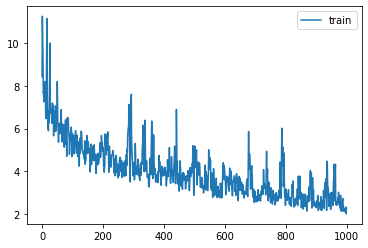

In [42]:
#train stacked lstm model
history=model1.fit(X_train,y_train, epochs=1000, shuffle=False,batch_size=60, verbose=1)
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.savefig('./loss_30day_layers.png')
plt.show()

In [44]:
#test data
X_test = pca.transform(exp_X_test)
X_test=X_test.reshape((X_test.shape[0],1,X_test.shape[1]))
#pred=model.predict(X_test)
pred=model1.predict(X_test)
actual = y_test[1:]

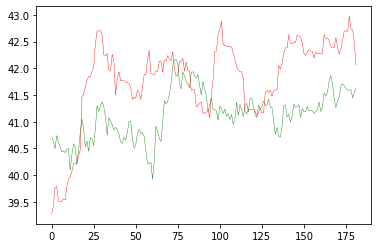

<Figure size 432x288 with 0 Axes>

In [45]:
#generate predicted vs actual approval ratings
plt.plot(pred, color='green',linewidth=0.4)
plt.plot(actual, color='red', linewidth=0.4)
plt.show()
plt.savefig('./predicted_approval_30day.png')

In [46]:
#calculate model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(actual, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(actual, pred)
print("mse, rmse, mae:" + str((mse,rmse,mae)))

mse, rmse, mae:(0.9562722100048723, 0.977891716911884, 0.8596240700254334)


In [47]:
#load in live sentiment data
livesent = pd.read_csv('./live_sent.csv')

In [48]:
livesent.head()

,Unnamed: 0,docname,0,1,2,3,4,5,6,7,...,91,92,93,94,95,96,97,98,99,date
0,0,0,0.0,-0.045352,0.0,0.0,-0.209236,0.0,0.0,-0.099317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-16 01:24:09
1,1,1,0.0,0.000000,0.0,0.0,-0.610849,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-16 01:24:10
2,2,2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-16 01:24:12
3,3,3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-16 01:24:21
4,4,4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-16 01:24:24


In [49]:
livesent = livesent.sort_values(ascending=True, by=['date'])

In [50]:
livesent.head()

,Unnamed: 0,docname,0,1,2,3,4,5,6,7,...,91,92,93,94,95,96,97,98,99,date
0,0,0,0.0,-0.045352,0.0,0.0,-0.209236,0.0,0.0,-0.099317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-16 01:24:09
1,1,1,0.0,0.000000,0.0,0.0,-0.610849,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-16 01:24:10
2,2,2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-16 01:24:12
3,3,3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-16 01:24:21
4,4,4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-07-16 01:24:24


In [53]:
#preprocessing for live data
movingAverage = 60
shared_textsent_nodates = shared_textsent_df.drop('date', axis=1)
rolling_windows = shared_textsent_nodates.rolling(movingAverage,1)
rolling_mean = rolling_windows.mean()
shared_textsent_nodates = rolling_mean

In [54]:
shared_textsent_nodates

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
388,0.089063,0.980872,0.041347,0.986340,0.940858,0.939670,0.987970,0.990515,0.782055,0.982423,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
389,0.092044,0.978414,0.036672,0.985306,0.924963,0.948966,0.988920,0.989885,0.810184,0.983125,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
390,0.114044,0.979311,0.039342,0.985031,0.913914,0.931961,0.988966,0.989508,0.808579,0.985894,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
391,0.104154,0.978534,0.040025,0.983464,0.918926,0.941911,0.988606,0.989311,0.805208,0.986883,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
392,0.101266,0.979199,0.041331,0.982834,0.906893,0.940442,0.988821,0.988698,0.793876,0.985770,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
393,0.084388,0.979885,0.040612,0.981374,0.909772,0.942966,0.988616,0.988137,0.795791,0.985880,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
394,0.081837,0.979770,0.039220,0.980407,0.911213,0.938804,0.988330,0.988080,0.798880,0.985810,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
395,0.084742,0.978365,0.038169,0.979001,0.908191,0.933869,0.987959,0.987481,0.796538,0.985032,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
396,0.094388,0.976572,0.038791,0.979481,0.908002,0.935195,0.987491,0.987244,0.799898,0.985915,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
397,0.099435,0.976795,0.039014,0.980397,0.912965,0.935109,0.988084,0.987566,0.799166,0.985490,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [55]:
dfLive = shared_textsent_nodates.copy(deep=True)
cols = dfLive.columns
cols = cols[1:]
dfLive[cols] = scaler.fit_transform(dfLive[cols])
dfLive.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
388,0.089063,1.000000,0.288723,1.000000,1.000000,0.644322,0.939082,1.000000,0.032483,0.713376,...,0.855542,0.0,0.720185,0.0,0.0,0.0,1.0,0.0,0.0,1.0
389,0.092044,0.873078,0.046010,0.954638,0.613763,0.954571,0.992389,0.968798,0.928497,0.752345,...,0.855542,0.0,0.720185,0.0,0.0,0.0,1.0,0.0,0.0,1.0
390,0.114044,0.919388,0.184638,0.942600,0.345262,0.387046,0.995004,0.950153,0.877384,0.906045,...,0.855542,0.0,0.720185,0.0,0.0,0.0,1.0,0.0,0.0,1.0
391,0.104154,0.879295,0.220092,0.873860,0.467056,0.719125,0.974761,0.940397,0.770009,0.960944,...,0.855542,0.0,0.720185,0.0,0.0,0.0,1.0,0.0,0.0,1.0
392,0.101266,0.913606,0.287862,0.846212,0.174643,0.670085,0.986822,0.910057,0.409025,0.899182,...,0.855542,0.0,0.720185,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [56]:
#generate predictions for live data
X_live = pca.transform(dfLive)
X_live=X_live.reshape((X_live.shape[0],1,X_live.shape[1]))
#pred=model.predict(X_test)
pred=model1.predict(X_live)

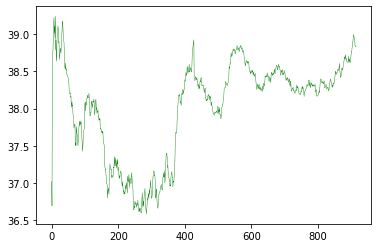

In [57]:
#plot predictions for live data
plt.plot(pred, color='green',linewidth=0.4)

In [58]:
plt.savefig('./live_prediction.png')

<Figure size 432x288 with 0 Axes>